# Experiments using Transformer Architecture

In [1]:
import torch
import torch.nn as nn
import numpy as np
from Transformer import Transformer, Transformer2D
from sklearn.preprocessing import StandardScaler
# Base Env params

# need to make feature and target steps the same for the embedding
feature_steps = 10
target_steps = 1

input_dim  = 1
d_model = 64
output_dim = 1
num_heads = 2
num_layers = 3
dim_feedforward = 256
seq_length = 6000 # max sequence length of the time series
dropout = 0.1
quantized = False
quant_all = False
weight_scale = 1e2
num_epochs = 100
n_clusters = 500
quantiles=(0.25,0.75)
device = 'cpu' # 'cuda' or 'cpu'. For 'cuda', requires GPU compatible with CUDA version 11.8 or higher, and PyTorch version 2.0 or higher.

(3272, 4)
ts (3272, 2)
Training for 25 epochs
torch.Size([2087, 10, 2])
(3262, 10, 2)


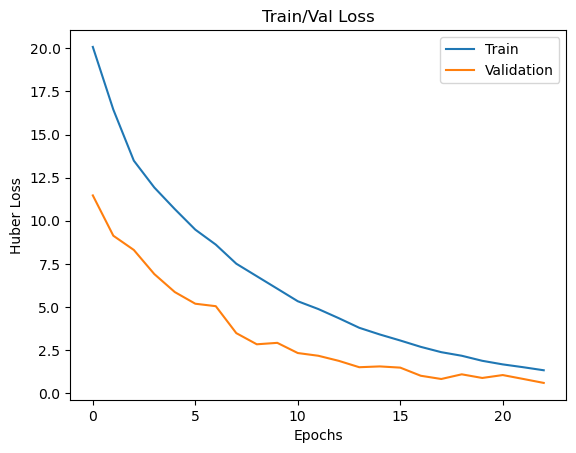

Final Train loss : 1.3243267115424662 final Val loss: 0.5902860283851623
Train preds shape : torch.Size([2087, 1, 4])


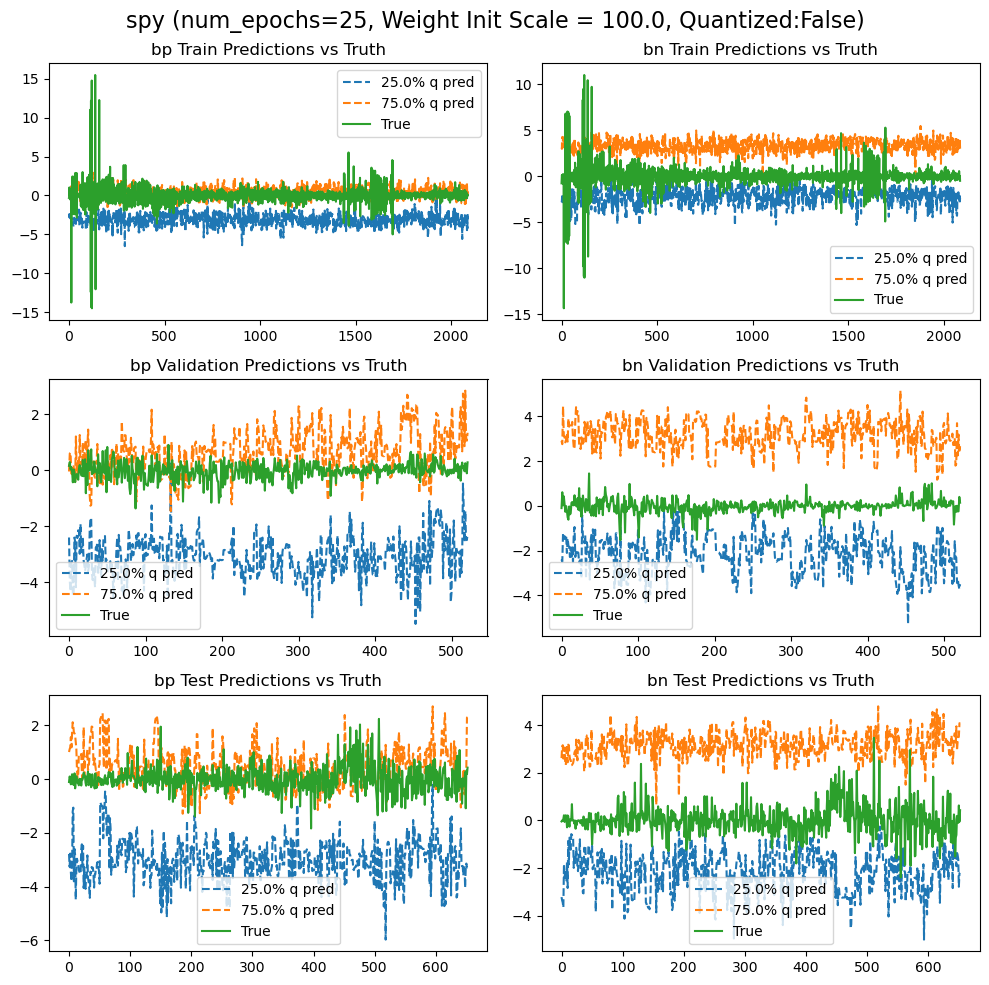

--------------------------------------------------
(3272, 4)
ts (3272, 2)
Training for 50 epochs
torch.Size([2087, 10, 2])
(3262, 10, 2)


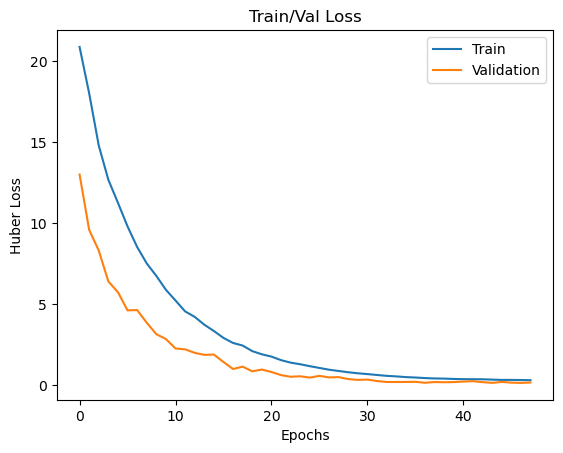

Final Train loss : 0.2970566258710973 final Val loss: 0.1527264177799225
Train preds shape : torch.Size([2087, 1, 4])


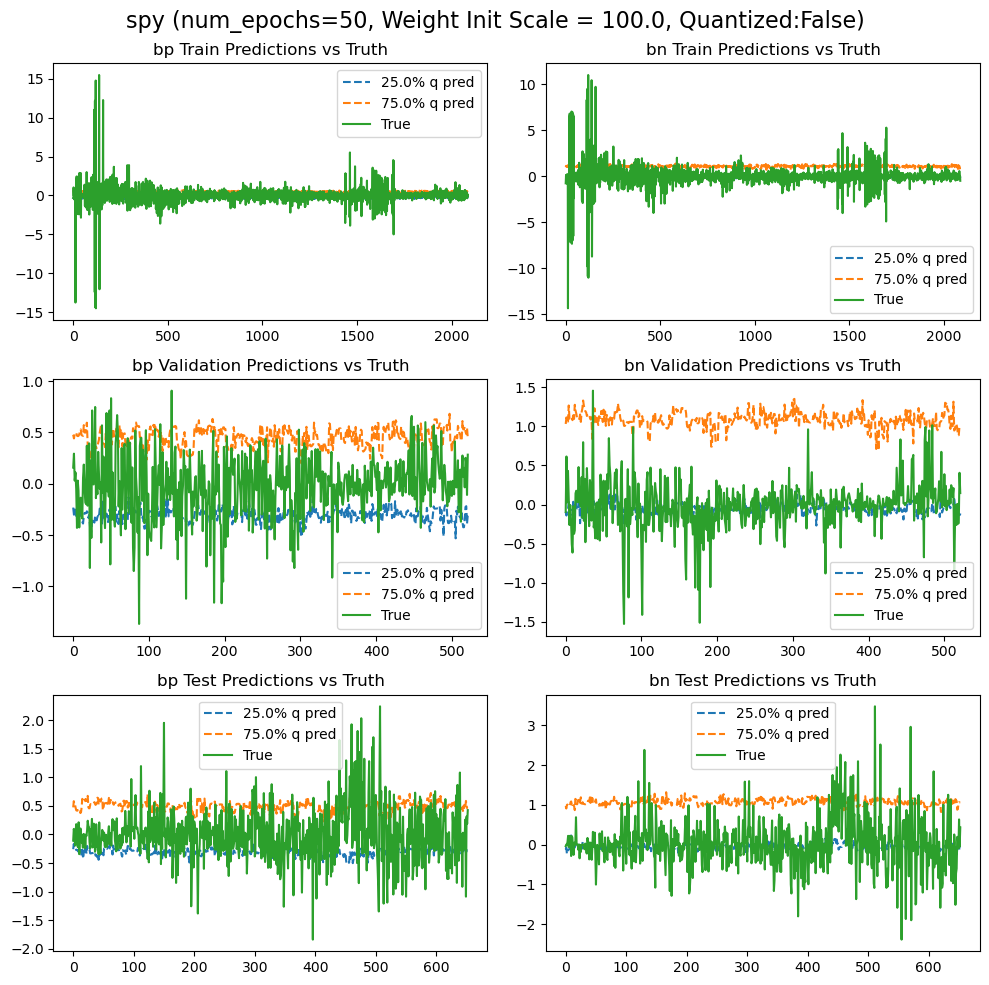

--------------------------------------------------


In [2]:
epoch_list = [25, 50]
input_dim = 2
#output_dim = 2
output_dim = 4
for e in epoch_list:
    num_epochs = e
    model = Transformer2D(tickers=['spy'], target_steps=target_steps,feature_steps=feature_steps, scaler=StandardScaler,
        input_dim=input_dim, d_model=d_model, num_heads=num_heads, num_layers=num_layers,
        dim_feedforward=dim_feedforward, output_dim=output_dim, seq_length=seq_length, dropout=dropout, quantized=quantized, quant_all=quant_all,
        n_clusters=n_clusters, scale=weight_scale, num_epochs=num_epochs, quantiles=quantiles, device=device)
    print(f"Training for {e} epochs")
    model.train()
    model.predict()
    model.plot_quantile_predicitons(t="spy", title=f"num_epochs={num_epochs}, Weight Init Scale = {weight_scale}, Quantized:{quantized}")
    print("-"*50)

## 1D Predictions

In [6]:
# epoch_list = [10,25, 50,100]
# input_dim = 1
# output_dim = 1
# for e in epoch_list:
#     num_epochs = e
#     model = Transformer(tickers=['spy'], target_steps=target_steps,feature_steps=feature_steps, scaler=StandardScaler,
#         input_dim=input_dim, d_model=d_model, num_heads=num_heads, num_layers=num_layers, n_clusters=n_clusters,
#         dim_feedforward=dim_feedforward, output_dim=output_dim, seq_length=seq_length, dropout=dropout, quantized=quantized, scale=weight_scale, num_epochs=num_epochs)
#     print(f"Training for {e} epochs")
#     model.train()
#     model.predict()
#     model.plot_predictions(t="spy", title=f"num_epochs={num_epochs}, Weight Init Scale = {weight_scale}, Quantized:{quantized}")
#     print("-"*50)